In [3]:
#Вставьте свой токен
access_token = '7f4638d7b6118a3f52cc7276acf34b71817866236fe2efaa423758a7cf61efa75c9aee9d1dbacfa596d9d'
owner_id = '-174151462'

import requests
import time 
import datetime
import csv
 
def getjson(url, data = None):
    response = requests.get(url, params = data)
    print(response.url, '\n')
    return response.json()
 
def get_all_posts (access_token, owner_id, count = 100, offset=0):
    all_posts = []
     
    while True:
        time.sleep(1)
        wall = getjson("https://api.vk.com/method/wall.get", {
            'owner_id' : owner_id, 
            'count' : count,
            'access_token' : access_token,
            'offset' : offset,
            'v' : '5.92'
            })
         
        count_posts = wall['response']['count']
        posts = wall['response']['items']
         
        all_posts.extend(posts)
         
        if len(all_posts) >= count_posts:
            break
        else:
            offset += 100
    return all_posts, count_posts
 
def make_posts(all_posts):
    filtered_data = []
    for post in all_posts:
         
        try:
            id = post['id']
        except:
            id = 0
             
        try:
            owner_id = str(post['owner_id'])[1:]
        except:
            owner_id = ''
             
        try:
            link = 'https://vk.com/wall-{owner_id}_{id}'.format(owner_id = owner_id, id = id)
        except:
            link = ''
             
        try:
            date = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%d-%m-%Y')
        except:
            date = ''
         
        try:
            day = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%d')
        except:
            day = ''
        try:
            month = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%B')
        except:
            month = ''
             
        try:
            year = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%Y')
        except:
            year = ''
 
        try:
            weekday = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%A')
        except:
            weekday = ''
 
        try:
            time = datetime.datetime.fromtimestamp(int(post['date'])).strftime('%H')
        except:
            time = ''
             
             
        try:
            likes = post['likes']['count']
        except:
            likes = 0
             
        try:
            reposts = post['reposts']['count']
        except:
            reposts = 0
             
        try:
            comments = post['comments']['count']
        except:
            comments = 0
             
        try:
            views = post['views']['count']
        except:
            views = 0
             
        try:
            text = post['text']
        except:
            text = ''
         
        photos = []
        videos = []
        docs = []
         
        try:
            attachments = post['attachments']
             
            if attachments:
                 
                for att in attachments:
                    if att['type'] == 'video':
                        video_title = att['video']['title']
                        video_owner_id = str(att['video']['owner_id'])[1:]
                        video_id = att['video']['id']
                        video_url ='https://vk.com/video-{}_{}'.format(video_owner_id, video_id)
                        videos.append({video_title : video_url})
 
                    if att['type'] == 'photo':
                        photo_id = att['photo']['id']
                        photo_owner_id = str(att['photo']['owner_id'])[1:]
                        photo_url = 'https://vk.com/photo-{}_{}'.format(photo_owner_id, photo_id)
                        photos.append(photo_url)
                         
                    if att['type'] == 'doc':
                        doc_url = att['doc']['url']
                        doc_title = att['doc']['title']
                        docs.append({doc_title : doc_url})
 
        except:
            attachments = ''
             
        if len(photos) == 0:
            photos = ''
        if len(videos) == 0:
            videos = ''
        if len(docs) == 0:
            docs = ''
             
        filtered_post = {
                'id' : id,
                'date' : date,
                'year' : year,
                'month' : month,
                'day' : day,
                'weekday' : weekday,
                'time' : time,

                'likes' : likes,
                'reposts' : reposts,
                'comments' : comments,
                'views' : views, 
                'text' : str(text),
                'photos' : photos,
                'videos' : videos,
                'docs' : docs,
                'link' : link,
                'group_id' : owner_id,
                }
         
         
        filtered_data.append(filtered_post)
     
    return filtered_data
def write_csv(data, encoding = 'utf-8'):

    owner_id = data[0]['group_id']
    filename = '{owner_id}-{datetime}.csv'.format(owner_id = owner_id, datetime= str(datetime.datetime.now())[:10] )
    with open(filename, 'w', newline = '', encoding = encoding) as csvfile:
        fieldnames = ['id','date','year','month','day', 'weekday', 'time',
                      'likes', 'reposts', 'views', 'comments', 'text', 
                      'photos', 'videos', 'docs', 'link']
         
        writer = csv.DictWriter(csvfile, delimiter = ';', fieldnames = fieldnames, extrasaction = 'ignore')
        writer.writeheader()
        writer.writerows(data)
         
        print ('Data written to csv', filename)
    csvfile.close
all_posts, count_posts = get_all_posts (access_token, owner_id) 
pposts = make_posts(all_posts)
write_csv(pposts)

https://api.vk.com/method/wall.get?owner_id=-174151462&count=100&access_token=7f4638d7b6118a3f52cc7276acf34b71817866236fe2efaa423758a7cf61efa75c9aee9d1dbacfa596d9d&offset=0&v=5.92 

Data written to csv 174151462-2020-02-17.csv


In [7]:
import pandas as pd
vkapi = pd.read_csv('174151462-2020-02-17.csv', sep=';', low_memory=False)
vkapi.head(10)

,id,date,year,month,day,weekday,time,likes,reposts,views,comments,text,photos,videos,docs,link
0,13,08-05-2019,2019,May,8,Wednesday,1,166,10,11577,12,"Мы рады поделиться с Вами нашим плейлистом, гд...",NaN,NaN,NaN,https://vk.com/wall-174151462_13
1,116,07-02-2020,2020,February,7,Friday,13,14,0,948,0,Поддержка!,NaN,NaN,NaN,https://vk.com/wall-174151462_116
2,109,30-01-2020,2020,January,30,Thursday,0,66,1,4356,14,Внимание! Конкурс!\n\nНам часто пишут битмейке...,['https://vk.com/photo-174151462_457239177'],NaN,NaN,https://vk.com/wall-174151462_109
3,108,27-01-2020,2020,January,27,Monday,20,32,0,2121,0,"Ребята, всем привет! \n\nНам нужен человек в к...",['https://vk.com/photo-174151462_457239176'],NaN,NaN,https://vk.com/wall-174151462_108
4,105,24-01-2020,2020,January,24,Friday,20,22,0,1807,2,[club151605610|DARREM] - Еще раз [club10830304...,['https://vk.com/photo-174151462_457239175'],NaN,NaN,https://vk.com/wall-174151462_105
5,99,15-01-2020,2020,January,15,Wednesday,20,38,0,2118,4,dudeontheguitar - cat \n \nArtist: [club173324...,NaN,[{'Без названия': 'https://vk.com/video-174151...,NaN,https://vk.com/wall-174151462_99
6,97,14-01-2020,2020,January,14,Tuesday,20,19,0,1912,0,ALZAID - Пить и тратить \n\nСлушайте на всех ц...,['https://vk.com/photo-174151462_457239168'],NaN,NaN,https://vk.com/wall-174151462_97
7,92,29-12-2019,2019,December,29,Sunday,21,80,1,2899,3,Что думаете? Делитесь.,NaN,NaN,NaN,https://vk.com/wall-174151462_92
8,91,29-12-2019,2019,December,29,Sunday,17,17,0,2332,0,ПРЕМЬЕРА!,NaN,NaN,NaN,https://vk.com/wall-174151462_91
9,90,27-12-2019,2019,December,27,Friday,14,36,1,2039,0,NaN,NaN,NaN,NaN,https://vk.com/wall-174151462_90


In [8]:
vkapi.columns

Index(['id', 'date', 'year', 'month', 'day', 'weekday', 'time', 'likes',
       'reposts', 'views', 'comments', 'text', 'photos', 'videos', 'docs',
       'link'],
      dtype='object')

In [12]:
max_laik = vkapi['likes'].describe()

Text(0.5,1,'Статистика по максимальному значению лайков за год')

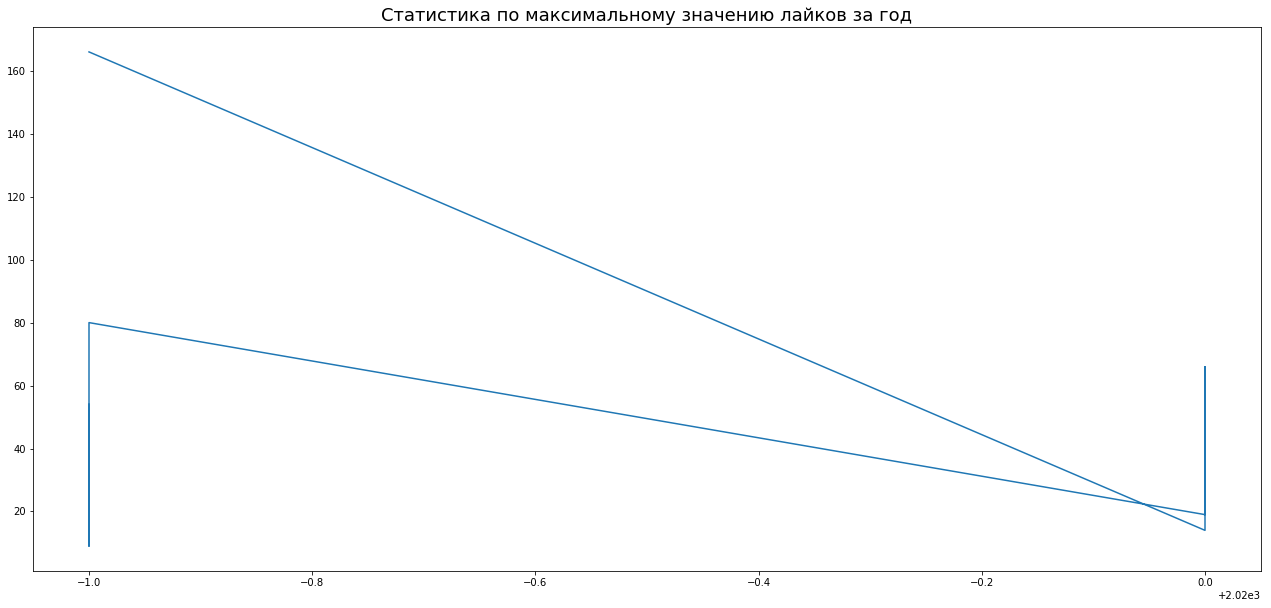

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)
ax.plot(vkapi['year'], vkapi['likes'])
fig.set_size_inches(22,10)
plt.title('Статистика по максимальному значению лайков за год',fontsize=18)

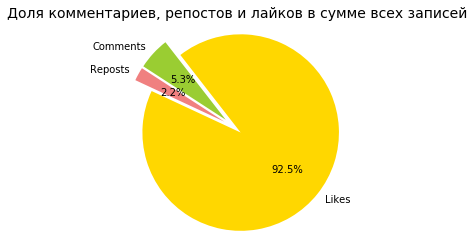

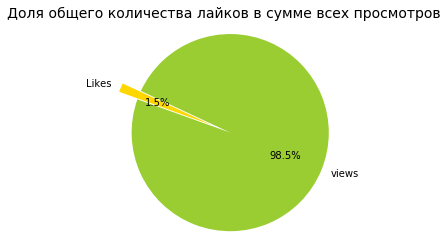

In [14]:
sum_like = pd.to_numeric(vkapi['likes']).sum()
sum_comments = pd.to_numeric(vkapi['comments']).sum()
sum_reposts = pd.to_numeric(vkapi['reposts']).sum()

labels = 'Likes', 'Comments', 'Reposts'
sizes = [sum_like, sum_comments, sum_reposts]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=155)
plt.title('Доля комментариев, репостов и лайков в сумме всех записей',fontsize=14)

plt.axis('equal')
plt.show()

sum_like = pd.to_numeric(vkapi['likes']).sum()
sum_views = pd.to_numeric(vkapi['views']).sum()

labels = 'Likes', 'views',
sizes = [sum_like, sum_views,]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=155)
plt.title('Доля общего количества лайков в сумме всех просмотров',fontsize=14)

plt.axis('equal')
plt.show()

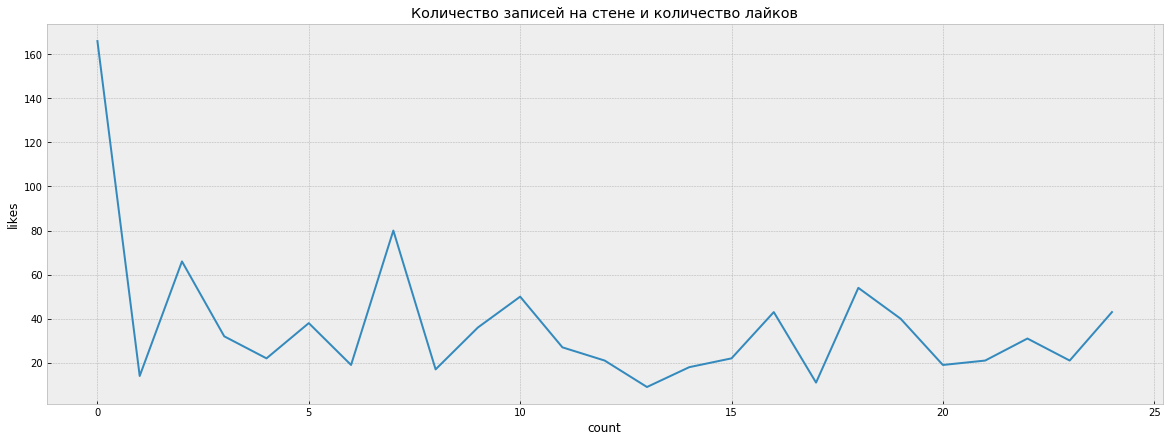

In [15]:
%matplotlib inline
plt.style.use('bmh')

likes = vkapi.likes
plt.figure(num=5, figsize=(20, 7))
plt.title('Количество записей на стене и количество лайков')
plt.xlabel('count')
plt.ylabel('likes')
plt.plot(likes, '-')

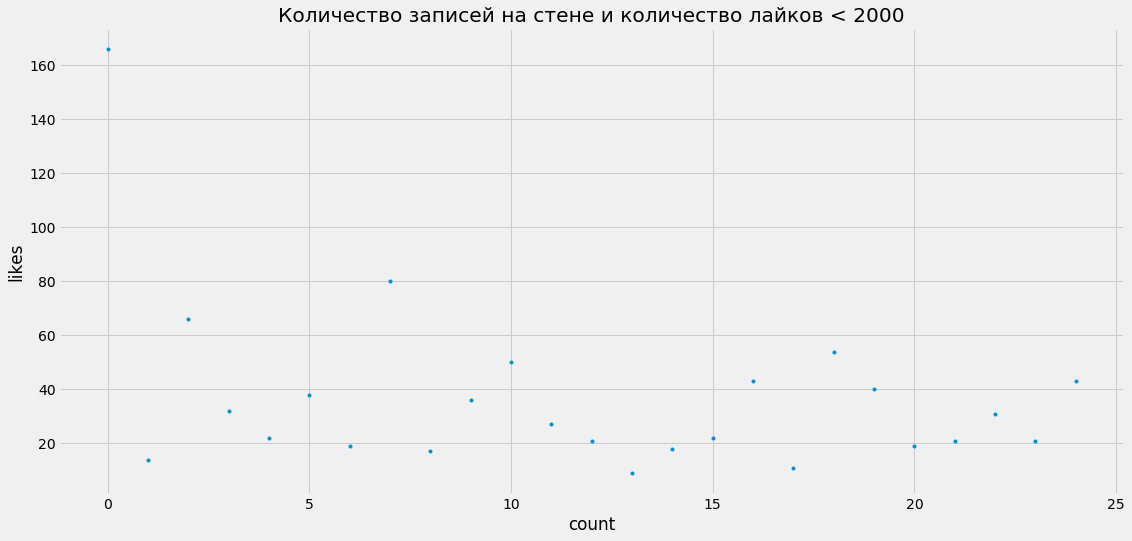

In [19]:
likes = vkapi[vkapi['likes'] < 1000 ]['likes']
plt.figure(num=1, figsize=(17, 8))
plt.title('Количество записей на стене и количество лайков < 2000')
plt.xlabel('count')
plt.ylabel('likes')
plt.plot(likes, '.')
plt.style.use('fivethirtyeight')

In [20]:
vkapi.time.value_counts()

20    6
14    4
17    3
16    3
13    2
23    1
22    1
21    1
19    1
12    1
1     1
0     1
Name: time, dtype: int64

c:\users\alisher\anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


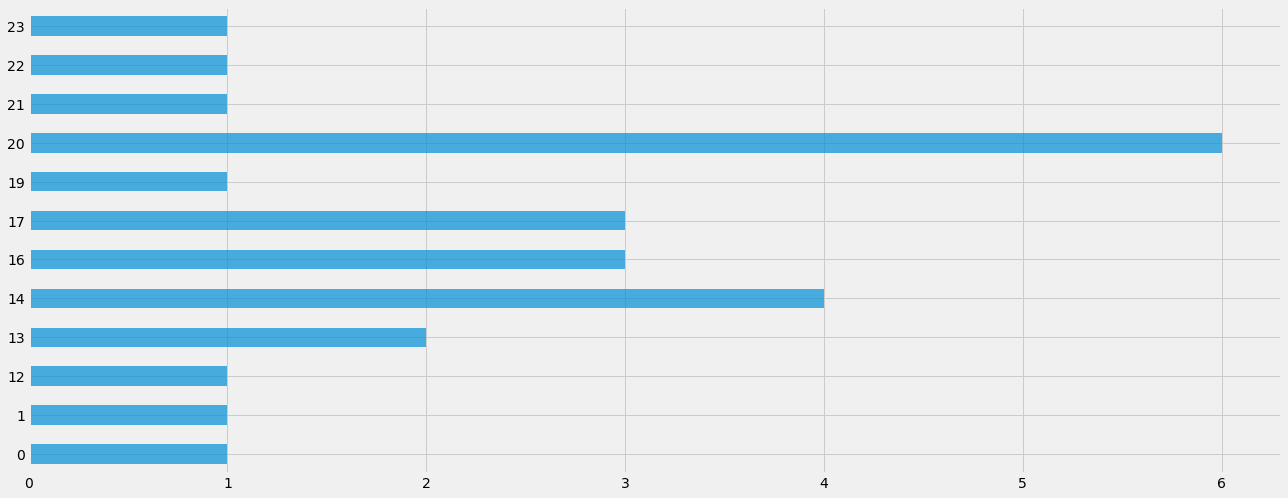

In [21]:
time_summary = vkapi.time.value_counts()[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
time_summary = vkapi.time.value_counts().sort_index()
plt.figure(num=1, figsize=(20, 8))
time_summary.plot.barh(stacked=True,alpha=0.7)
plt.style.use('fivethirtyeight')

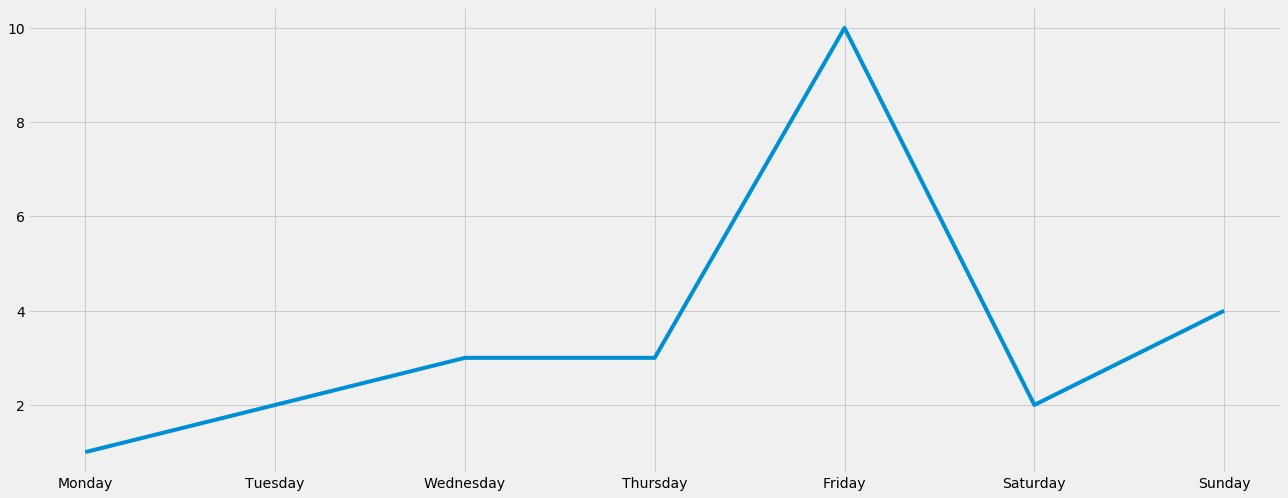

In [22]:
weekday_summary = vkapi.weekday.value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(num=1, figsize=(20, 8))
plt.plot(weekday_summary, '-')
plt.style.use('fivethirtyeight')